In [ ]:
시계열 데이터 <-> Pointdata(정적데이터)

오전
시계열 데이터 이상탐지

오후
interpolation 보간 
pattern 


In [ ]:
시계열 데이터 이상탐지

시계열 분해 : 시계열을 몇 가지 성분을 나누어 이해하는 작업 (trend, sesonality, cycle) 

STL(Seasonal and Trend decomposition using Losses) 
    월별 , 분기별 데이터포함 어떤 종류의 계절성도 다룰수 있음
    trend 와 Sesonality를 제거한 나머지(잔차(residual) , 나머지(remainder)) 로 분석할수있다.


장점 : 분기별 ,월별 , 일별 분해 모두가능
     : 데이터 유실없음. (MA -Moving Average 가 아니기때문에 , MA란 그래프에서 점찍은걸 step 3 을정하면 점 3개가오면 평균구하고 ... 이런식으로 구하면
                         step 크기만큼 없어짐)
     : 돌발스런 이상치에 대해 추세ㅡ 주기에 영향을 미치지 않음
        
단점 : 캘린더 데이터를 반영하지 못함 , 일별 데이터로 변환하여 넣어줘야함
     : 덧셈 분해 기능만 제공




In [2]:
!pip install statsmodels

                                              0.0/9.4 MB ? eta -:--:--
                                              0.1/9.4 MB 2.3 MB/s eta 0:00:05
     --                                       0.5/9.4 MB 5.5 MB/s eta 0:00:02
     ----                                     1.0/9.4 MB 7.0 MB/s eta 0:00:02
     ----                                     1.0/9.4 MB 7.4 MB/s eta 0:00:02
     ----                                     1.0/9.4 MB 7.4 MB/s eta 0:00:02
     ----                                     1.0/9.4 MB 7.4 MB/s eta 0:00:02
     ----                                     1.0/9.4 MB 7.4 MB/s eta 0:00:02
     ----                                     1.0/9.4 MB 7.4 MB/s eta 0:00:02
     ----                                     1.0/9.4 MB 7.4 MB/s eta 0:00:02
     ------                                   1.5/9.4 MB 3.1 MB/s eta 0:00:03
     --------                                 2.0/9.4 MB 3.9 MB/s eta 0:00:02
     --------                                 2.1/9.4 MB 4.0 MB/s eta 0

In [ ]:
from statsmodels 

In [ ]:
Hot-winters(시계열 분해 기반 이상탐지)

정의 : STL은 강력한 시계열 분해 방법이지만 지속적으로 증가하는 (multiplicative) 이상 Point 탐지에 대해선 약점을 가지고있음
     : 가까운 데이터는 가중치는 높게 할당하고 오래전 데이터는 가중치를 작게 할당하여 미래의 x 값을 예측
     : exponential smoothinh(지수평할)기법
     : Holt-winterrs알고리즘은 단순한 exponential smoothing 뿐아니라 trend속성, seasonality속성이 추가 
     : 

지수평할기법쓰고 -> 시간데이터 예측 -> brutlag 알고리즘 활용해 신뢰구간 설정해 이상탐지 (신뢰구간안에 잇는건 정상) 



In [1]:
import pandas as pd 
df = pd.read_csv("C:/Users/PC/Desktop/Carlos/samsung.csv", encoding="cp949")
df.head()

일자     종가    대비   등락률     시가     고가     저가       거래량          거래대금  \
0  2023-07-31  69800  -800 -1.13  70900  71000  69800  13035420  9.149940e+11   
1  2023-07-28  70600 -1100 -1.53  71800  72400  70100  19420683  1.374120e+12   
2  2023-07-27  71700  1900  2.72  69900  71700  69300  24261179  1.716360e+12   
3  2023-07-26  69800  -200 -0.29  69800  70600  68100  30016221  2.074080e+12   
4  2023-07-25  70000  -400 -0.57  70000  70500  69800  14314945  1.002550e+12   

           시가총액       상장주식수  
0  4.166910e+14  5969782550  
1  4.214670e+14  5969782550  
2  4.280330e+14  5969782550  
3  4.166910e+14  5969782550  
4  4.178850e+14  5969782550

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      495 non-null    object 
 1   종가      495 non-null    int64  
 2   대비      495 non-null    int64  
 3   등락률     495 non-null    float64
 4   시가      495 non-null    int64  
 5   고가      495 non-null    int64  
 6   저가      495 non-null    int64  
 7   거래량     495 non-null    int64  
 8   거래대금    495 non-null    float64
 9   시가총액    495 non-null    float64
 10  상장주식수   495 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 42.7+ KB


In [3]:
df["일자"] = pd.to_datetime(df["일자"])
df.set_index("일자", inplace=True)

In [4]:
df.resample("1s").mean()

종가     대비   등락률       시가       고가       저가  \
일자                                                                     
2021-07-29 00:00:00  79000.0 -200.0 -0.25  78800.0  79400.0  78800.0   
2021-07-29 00:00:01      NaN    NaN   NaN      NaN      NaN      NaN   
2021-07-29 00:00:02      NaN    NaN   NaN      NaN      NaN      NaN   
2021-07-29 00:00:03      NaN    NaN   NaN      NaN      NaN      NaN   
2021-07-29 00:00:04      NaN    NaN   NaN      NaN      NaN      NaN   
...                      ...    ...   ...      ...      ...      ...   
2023-07-30 23:59:56      NaN    NaN   NaN      NaN      NaN      NaN   
2023-07-30 23:59:57      NaN    NaN   NaN      NaN      NaN      NaN   
2023-07-30 23:59:58      NaN    NaN   NaN      NaN      NaN      NaN   
2023-07-30 23:59:59      NaN    NaN   NaN      NaN      NaN      NaN   
2023-07-31 00:00:00  69800.0 -800.0 -1.13  70900.0  71000.0  69800.0   

                            거래량          거래대금          시가총액         상장주식수  
일자                                                                         
2021-07-29 00:00:00  14360453.0  1.134760e+12  4.716130e+14  5.969783e+09  
2021-07-29 00:00:01         NaN           NaN           NaN           NaN  
2021-07-29 00:00:02         NaN           NaN           NaN           NaN  
2021-07-29 00:00:03         NaN           NaN           NaN           NaN  
2021-07-29 00:00:04         NaN           NaN           NaN           NaN  
...                         ...           ...           ...           ...  
2023-07-30 23:59:56         NaN           NaN           NaN           NaN  
2023-07-30 23:59:57         NaN           NaN           NaN           NaN  
2023-07-30 23:59:58         NaN           NaN           NaN           NaN  
2023-07-30 23:59:59         NaN           NaN           NaN           NaN  
2023-07-31 00:00:00  13035420.0  9.149940e+11  4.166910e+14  5.969783e+09  

[63244801 rows x 10 columns]

In [8]:
df.resample("1h").max()

종가     대비   등락률       시가       고가       저가  \
일자                                                                     
2021-07-29 00:00:00  79000.0 -200.0 -0.25  78800.0  79400.0  78800.0   
2021-07-29 01:00:00      NaN    NaN   NaN      NaN      NaN      NaN   
2021-07-29 02:00:00      NaN    NaN   NaN      NaN      NaN      NaN   
2021-07-29 03:00:00      NaN    NaN   NaN      NaN      NaN      NaN   
2021-07-29 04:00:00      NaN    NaN   NaN      NaN      NaN      NaN   
...                      ...    ...   ...      ...      ...      ...   
2023-07-30 20:00:00      NaN    NaN   NaN      NaN      NaN      NaN   
2023-07-30 21:00:00      NaN    NaN   NaN      NaN      NaN      NaN   
2023-07-30 22:00:00      NaN    NaN   NaN      NaN      NaN      NaN   
2023-07-30 23:00:00      NaN    NaN   NaN      NaN      NaN      NaN   
2023-07-31 00:00:00  69800.0 -800.0 -1.13  70900.0  71000.0  69800.0   

                            거래량          거래대금          시가총액         상장주식수  
일자                                                                         
2021-07-29 00:00:00  14360453.0  1.134760e+12  4.716130e+14  5.969783e+09  
2021-07-29 01:00:00         NaN           NaN           NaN           NaN  
2021-07-29 02:00:00         NaN           NaN           NaN           NaN  
2021-07-29 03:00:00         NaN           NaN           NaN           NaN  
2021-07-29 04:00:00         NaN           NaN           NaN           NaN  
...                         ...           ...           ...           ...  
2023-07-30 20:00:00         NaN           NaN           NaN           NaN  
2023-07-30 21:00:00         NaN           NaN           NaN           NaN  
2023-07-30 22:00:00         NaN           NaN           NaN           NaN  
2023-07-30 23:00:00         NaN           NaN           NaN           NaN  
2023-07-31 00:00:00  13035420.0  9.149940e+11  4.166910e+14  5.969783e+09  

[17569 rows x 10 columns]

In [6]:
df_resampled_interpolated= df.resample('1s').max().interpolate()

In [ ]:
%matplotlib inline

In [20]:
df.iloc[:1000, :2].plot(backend='plotly')

In [12]:
df_resamdpled_interpolated= df.resample('60s').max().interpolate()

In [19]:
df = df.resample("1h").max()
filtered_df = df[df.index > "2023-04-12 20:00:00"]
filtered_df

종가     대비   등락률       시가       고가       저가  \
일자                                                                     
2023-04-12 21:00:00      NaN    NaN   NaN      NaN      NaN      NaN   
2023-04-12 22:00:00      NaN    NaN   NaN      NaN      NaN      NaN   
2023-04-12 23:00:00      NaN    NaN   NaN      NaN      NaN      NaN   
2023-04-13 00:00:00  66100.0  100.0  0.15  65600.0  66100.0  65400.0   
2023-04-13 01:00:00      NaN    NaN   NaN      NaN      NaN      NaN   
...                      ...    ...   ...      ...      ...      ...   
2023-07-30 20:00:00      NaN    NaN   NaN      NaN      NaN      NaN   
2023-07-30 21:00:00      NaN    NaN   NaN      NaN      NaN      NaN   
2023-07-30 22:00:00      NaN    NaN   NaN      NaN      NaN      NaN   
2023-07-30 23:00:00      NaN    NaN   NaN      NaN      NaN      NaN   
2023-07-31 00:00:00  69800.0 -800.0 -1.13  70900.0  71000.0  69800.0   

                            거래량          거래대금          시가총액         상장주식수  
일자                                                                         
2023-04-12 21:00:00         NaN           NaN           NaN           NaN  
2023-04-12 22:00:00         NaN           NaN           NaN           NaN  
2023-04-12 23:00:00         NaN           NaN           NaN           NaN  
2023-04-13 00:00:00  15091022.0  9.936540e+11  3.946030e+14  5.969783e+09  
2023-04-13 01:00:00         NaN           NaN           NaN           NaN  
...                         ...           ...           ...           ...  
2023-07-30 20:00:00         NaN           NaN           NaN           NaN  
2023-07-30 21:00:00         NaN           NaN           NaN           NaN  
2023-07-30 22:00:00         NaN           NaN           NaN           NaN  
2023-07-30 23:00:00         NaN           NaN           NaN           NaN  
2023-07-31 00:00:00  13035420.0  9.149940e+11  4.166910e+14  5.969783e+09  

[2620 rows x 10 columns]

In [ ]:
시계열 예측 (Time-Series Forecasting)


In [1]:
import pandas as pd 

df = pd.read_csv("C:/Users/PC/Desktop/Carlos/samsung.csv", encoding="euc-kr")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      495 non-null    object 
 1   종가      495 non-null    int64  
 2   대비      495 non-null    int64  
 3   등락률     495 non-null    float64
 4   시가      495 non-null    int64  
 5   고가      495 non-null    int64  
 6   저가      495 non-null    int64  
 7   거래량     495 non-null    int64  
 8   거래대금    495 non-null    float64
 9   시가총액    495 non-null    float64
 10  상장주식수   495 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 42.7+ KB


In [2]:
df.head(1)
df= df.drop(["대비","등락률","시가총액","상장주식수"], axis=1)
df.head(1)

일자     종가     시가     고가     저가       거래량          거래대금
0  2023-07-31  69800  70900  71000  69800  13035420  9.149940e+11

In [3]:
df = df.sort_index()
df.head(1)

일자     종가     시가     고가     저가       거래량          거래대금
0  2023-07-31  69800  70900  71000  69800  13035420  9.149940e+11

In [4]:
df["일자"] = pd.to_datetime(df["일자"])
df.set_index("일자", inplace=True)
df.head(1)

종가     시가     고가     저가       거래량          거래대금
일자                                                            
2023-07-31  69800  70900  71000  69800  13035420  9.149940e+11

In [5]:
df = df.resample("1D").mean()
df.head()

종가       시가       고가       저가         거래량          거래대금
일자                                                                      
2021-07-29  79000.0  78800.0  79400.0  78800.0  14360453.0  1.134760e+12
2021-07-30  78500.0  78900.0  78900.0  78500.0  13823411.0  1.086490e+12
2021-07-31      NaN      NaN      NaN      NaN         NaN           NaN
2021-08-01      NaN      NaN      NaN      NaN         NaN           NaN
2021-08-02  79300.0  79200.0  79500.0  78700.0  11739124.0  9.291540e+11

In [6]:
df= df.interpolate(method="linear")
df.head()

종가       시가       고가            저가           거래량  \
일자                                                                       
2021-07-29  79000.000000  78800.0  79400.0  78800.000000  1.436045e+07   
2021-07-30  78500.000000  78900.0  78900.0  78500.000000  1.382341e+07   
2021-07-31  78766.666667  79000.0  79100.0  78566.666667  1.312865e+07   
2021-08-01  79033.333333  79100.0  79300.0  78633.333333  1.243389e+07   
2021-08-02  79300.000000  79200.0  79500.0  78700.000000  1.173912e+07   

                    거래대금  
일자                        
2021-07-29  1.134760e+12  
2021-07-30  1.086490e+12  
2021-07-31  1.034045e+12  
2021-08-01  9.815993e+11  
2021-08-02  9.291540e+11

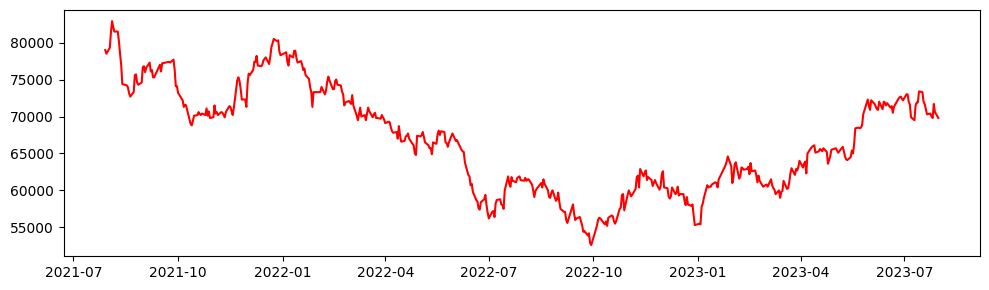

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.plot(df["종가"],c='r')
plt.tight_layout()
plt.show()

In [8]:
import numpy as np

def timeseries_reframed(data, N_input=1, N_output=1, stride=1):
    data = data.values.T
    X = np.array([np.roll(data, -i)[:, :data.shape[1]-N_input-N_output+1] for i in range(N_input)])
    X = np.transpose(X, axes=[2,0,1])[::stride]

    y = np.array([np.roll(data, -i)[:, N_input:data.shape[1]-N_output+1] for i in range(N_output)])
    y = np.transpose(y, axes=[2,0,1])[::stride]
    return X, y

In [9]:
N_input = 50 
N_output =10
stride=1 

In [10]:
X ,y = timeseries_reframed(df,N_input,N_output,1)
X.shape,y.shape

((674, 50, 6), (674, 10, 6))

★★시계열 데이터는 일련의 시간 순서대로 기록된 데이터를 의미합니다. 

이러한 데이터를 활용하여 미래 값을 예측하거나 시간에 따른 패턴을 분석하는 경우, 
"single step"과 "multi step"이라는 용어가 사용됩니다.




<h1>Single Step:</h1>
"Single step"은 단일 시간 단계를 예측하는 것을 의미합니다. 즉, 시계열 데이터에서 다음 시간 단계의 값을 예측하는 것을 말합니다.


예를 들어, 과거 7일간의 매일 온도 데이터가 주어지고, 이를 기반으로 다음 날의 온도를 예측하는 것이 "single step" 예측입니다



<h1>Multi Step:</h1>
"Multi step"은 여러 시간 단계를 예측하는 것을 의미합니다. 즉, 시계열 데이터에서 다음 여러 시간 단계의 값을 예측하는 것을 말합니다. 


예를 들어, 과거 7일간의 매일 온도 데이터가 주어졌을 때, 이를 기반으로 내일부터 3일 뒤까지의 온도를 예측하는 것이 "multi step" 예측입니다.

-





요약하면, "single step"은 단일 미래 시간 단계 예측이며, "multi step"은 여러 미래 시간 단계를 예측하는 것입니다.


이러한 예측 방법들은 시계열 데이터 분석과 예측에 널리 활용되는 기법입니다.


<h1>Multi Horizon:</h1>
"Multi horizon"은 여러 개의 다른 미래 시간 단계를 예측하는 것을 의미합니다. "Multi step"과 비슷해 보일 수 있지만, "multi horizon"은 각 예측 시간 단계에 대해 서로 다른 예측 모델이 사용되는 경우를 가리킵니다.
예를 들어, 주어진 시계열 데이터에서 내일, 3일 뒤, 7일 뒤의 값을 예측하는 문제를 고려해 봅시다. "Multi step"에서는 하나의 모델을 사용하여 이들 모든 시간 단계의 값을 한 번에 예측합니다. 반면에 "multi horizon"에서는 각 시간 단계에 대해 서로 다른 모델이 사용될 수 있습니다. 즉, 내일 값을 예측하는데 하나의 모델을 사용하고, 3일 뒤 값을 예측하는데 다른 모델을 사용하며, 7일 뒤 값을 예측하는데 또 다른 모델을 사용할 수 있습니다.

"Multi horizon"은 각 시간 단계별로 데이터의 특성과 패턴이 다를 때 유용하게 사용될 수 있습니다. 이는 복잡한 시계열 예측 문제에 대해 더 정확한 예측을 가능하게 할 수 있습니다.

In [11]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y[:,:,0], test_size=0.2, shuffle=False )
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, shuffle=False )
 
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((431, 50, 6), (108, 50, 6), (135, 50, 6), (431, 10), (108, 10), (135, 10))

In [ ]:
!pip install tensorflow-addons

In [13]:
import os
import warnings
warnings.filterwarnings("ignore")

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50, 6)]           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 50, 64)            4288      
                                                                 
 group_normalization_3 (Grou  (None, 50, 64)           128       
 pNormalization)                                                 
                                                                 
 conv1d_4 (Conv1D)           (None, 50, 128)           90240     
                                                                 
 group_normalization_4 (Grou  (None, 50, 128)          256       
 pNormalization)                                                 
                                                                 
 conv1d_5 (Conv1D)           (None, 50, 256)           3607

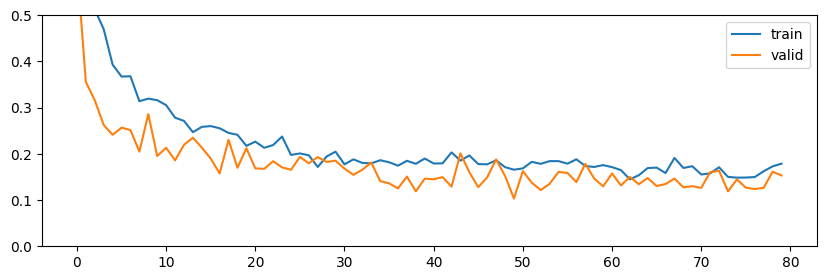

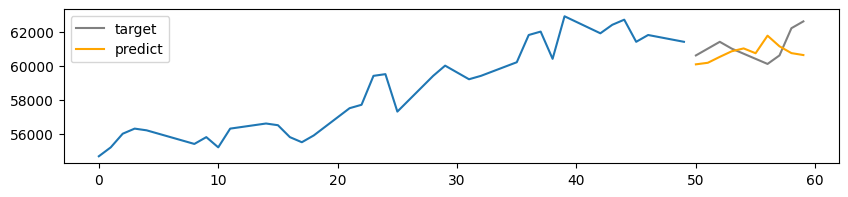

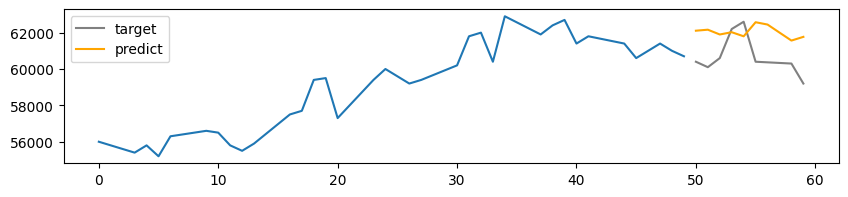

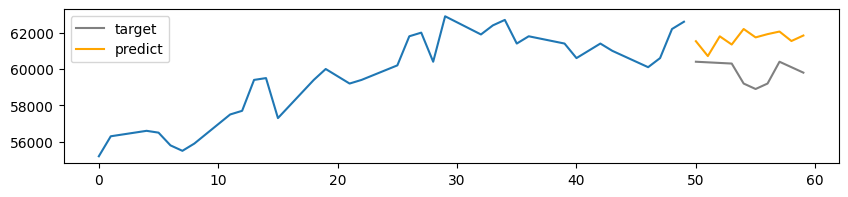

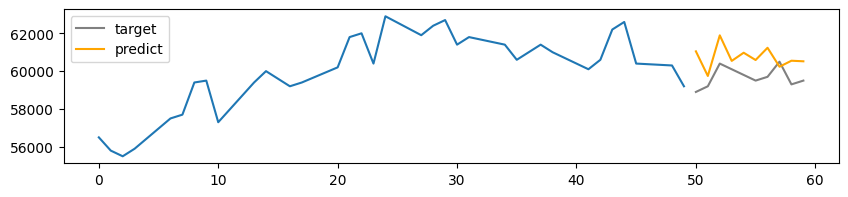

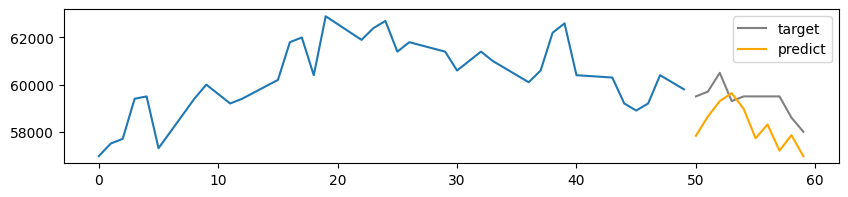

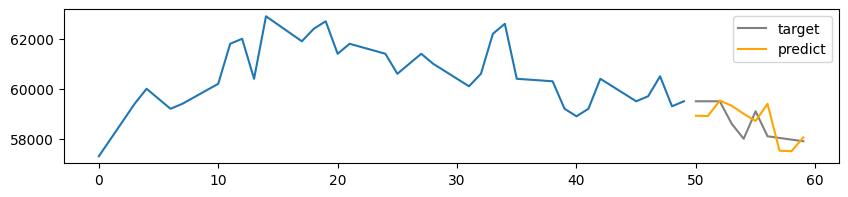

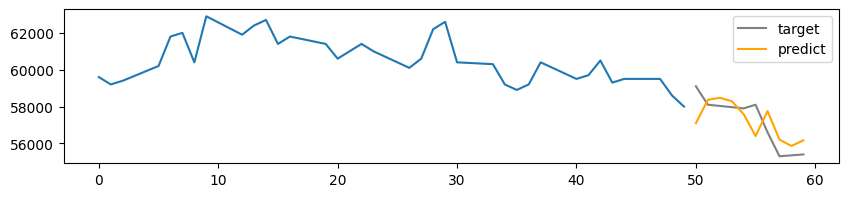

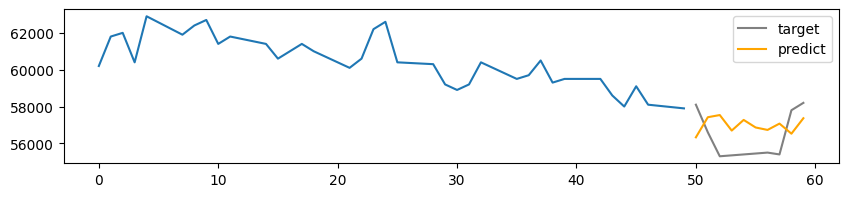

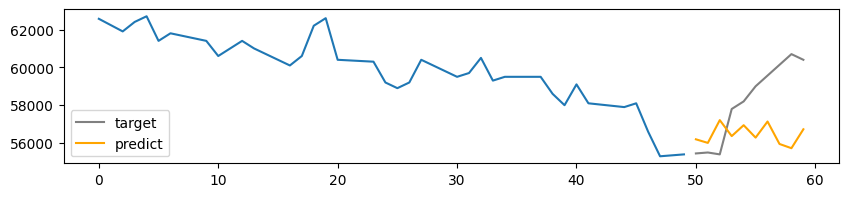

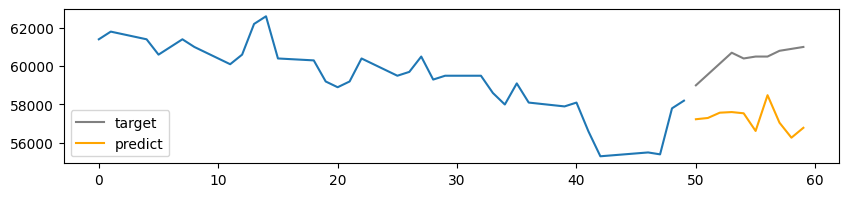

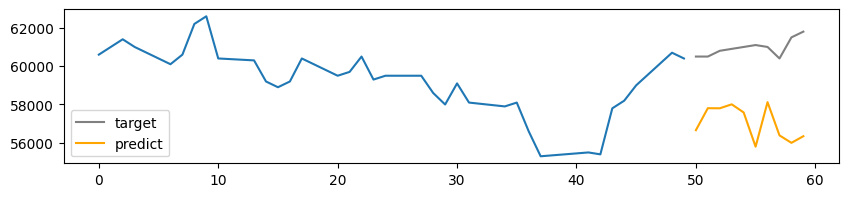

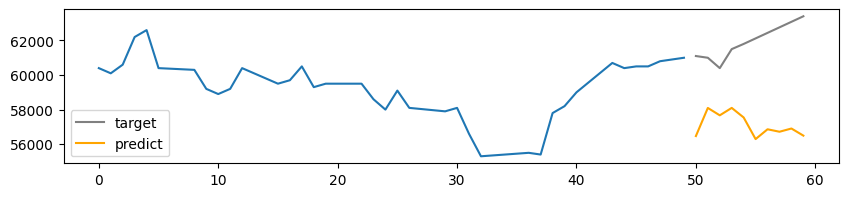

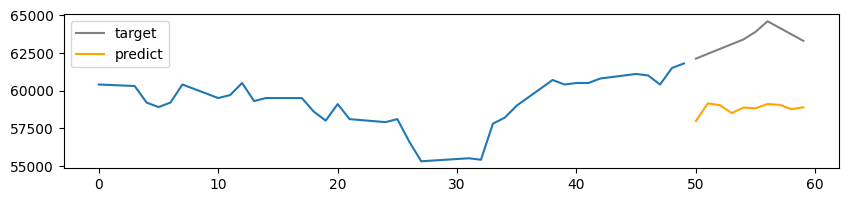

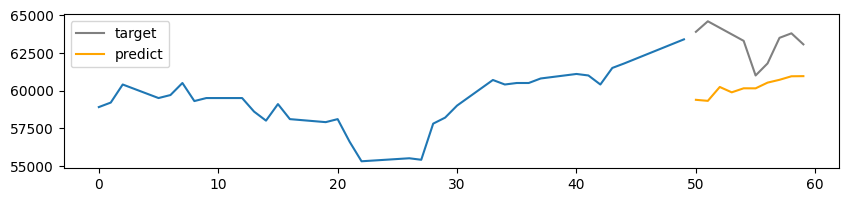

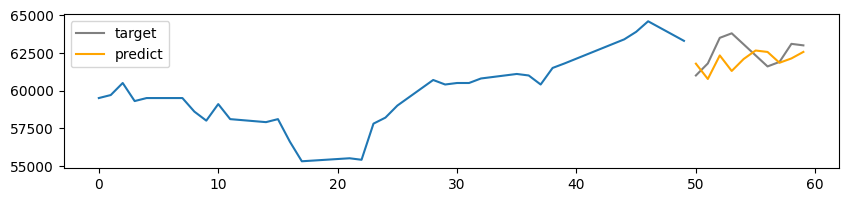

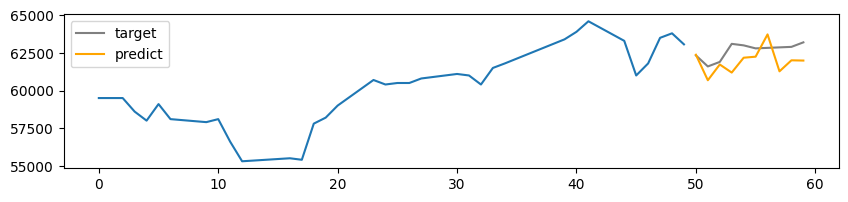

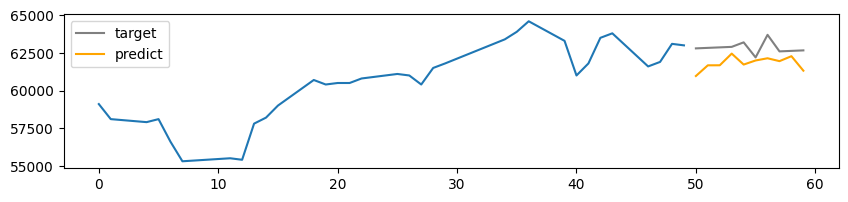

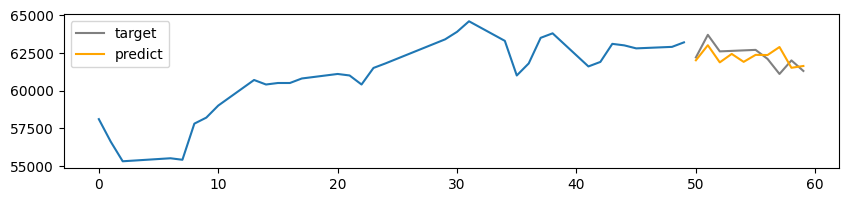

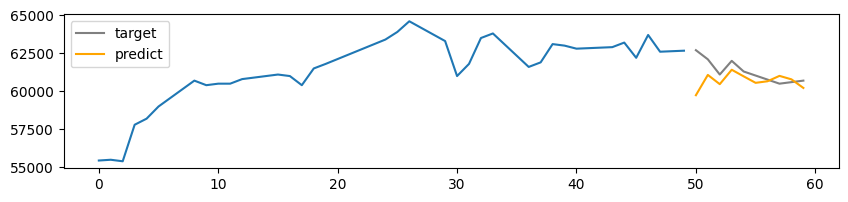

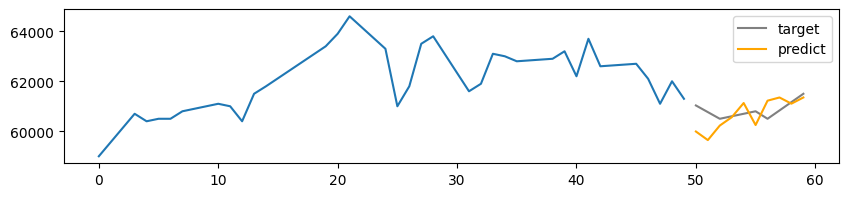

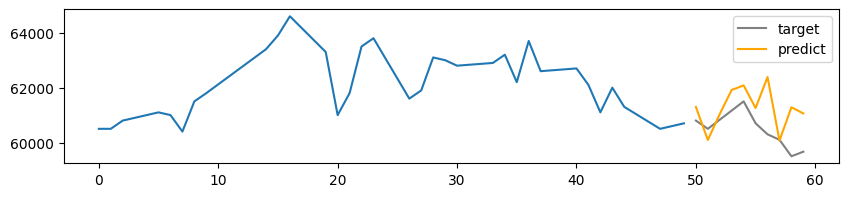

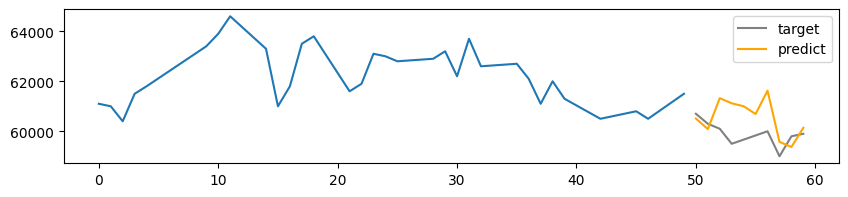

In [15]:
import tensorflow as tf

X_tr = np.reshape(tf.cast(X_train, tf.float32), (-1, X_train.shape[2])) 
X_va = np.reshape(tf.cast(X_val, tf.float32), (-1, X_train.shape[2]))
X_te = np.reshape(tf.cast(X_test, tf.float32), (-1, X_train.shape[2])) 

X_tr.shape, X_va.shape, X_te.shape
 
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = X_scaler.fit_transform(X_tr)
X_val_scaled = X_scaler.transform(X_va)
X_test_scaled = X_scaler.transform(X_te)

y_train_scaled = y_scaler.fit_transform(y_train)
y_val_scaled = y_scaler.transform(y_val)
y_test_scaled = y_scaler.transform(y_test)
 

X_tr = np.reshape(X_train_scaled, (-1, X_train.shape[1], X_train.shape[2])) 
X_va = np.reshape(X_val_scaled, (-1, X_train.shape[1], X_train.shape[2])) 
X_te = np.reshape(X_test_scaled, (-1, X_train.shape[1], X_train.shape[2]))

y_tr = y_train_scaled
y_va = y_val_scaled
y_te = y_test_scaled

X_tr.shape, X_va.shape, X_te.shape, y_tr.shape, y_va.shape, y_te.shape
 

import tensorflow_addons as tfa

inputs = tf.keras.layers.Input((N_input, X_train.shape[2]))
x = inputs

x = tf.keras.layers.Conv1D(64, kernel_size=11, strides=1, padding='same', activation='gelu')(x)
x = tfa.layers.GroupNormalization()(x)

x = tf.keras.layers.Conv1D(128, kernel_size=11, strides=1, padding='same', activation='gelu')(x)
x = tfa.layers.GroupNormalization()(x)

x = tf.keras.layers.Conv1D(256, kernel_size=11, strides=1, padding='same', activation='gelu')(x)
x = tfa.layers.GroupNormalization()(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(128, activation='gelu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(N_output, activation='linear')(x)
model = tf.keras.models.Model(inputs=inputs, outputs=x)

model.summary()
 
patience = 30
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, 
                                              mode='min', restore_best_weights=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) 
model.compile(optimizer=optimizer, loss='mse')
history = model.fit(X_tr, y_tr, validation_data=[X_va, y_va], epochs=200, batch_size=16,initial_epoch=1,
                    callbacks = [early_stop])
 
plt.figure(figsize=(10,3))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.ylim(0, 0.5)
plt.show() 

pred_va = model(X_va)
pred_va = y_scaler.inverse_transform(pred_va)

for idx in range(0, X_val.shape[0], 5):
    plt.figure(figsize=(10,2))
    plt.plot(np.arange(N_input), X_val[idx, :, 0])
    plt.plot(np.arange(N_input, N_input+N_output), y_val[idx, :], color='gray', label='target')
    plt.plot(np.arange(N_input, N_input+N_output), pred_va[idx, :], color='orange', label='predict')
    plt.legend()
    plt.show()

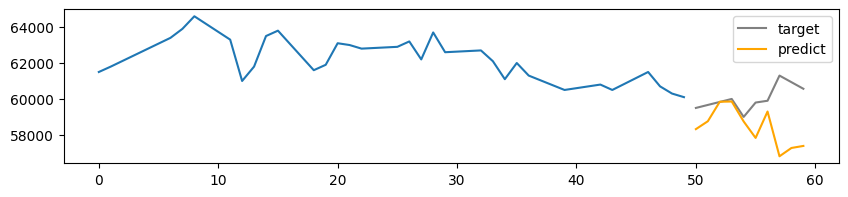

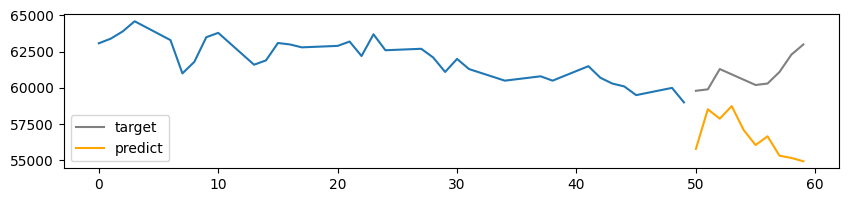

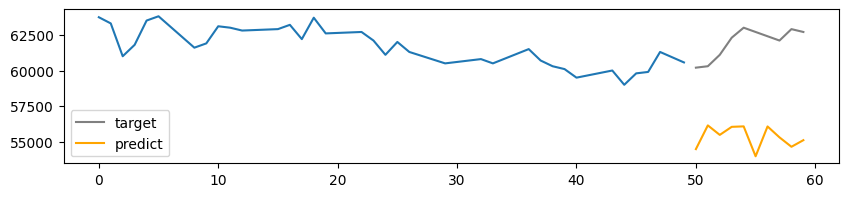

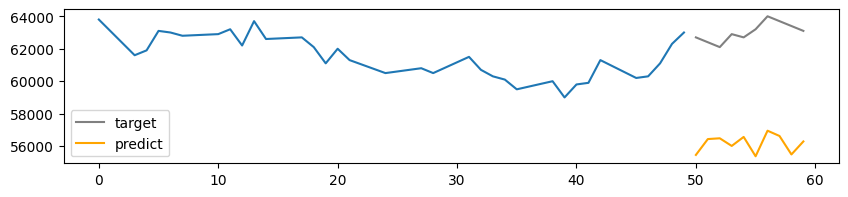

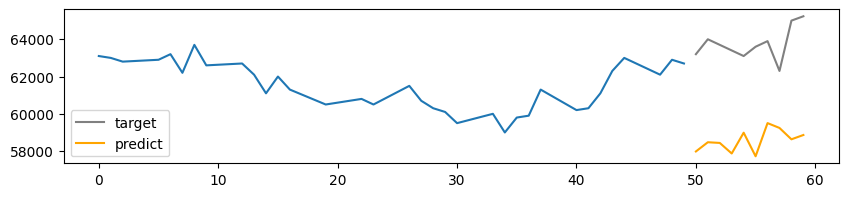

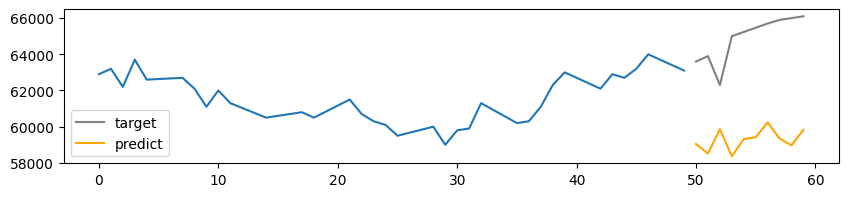

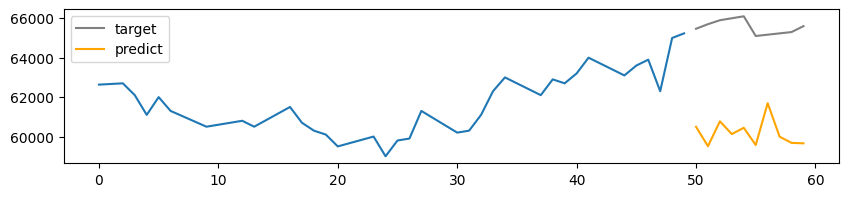

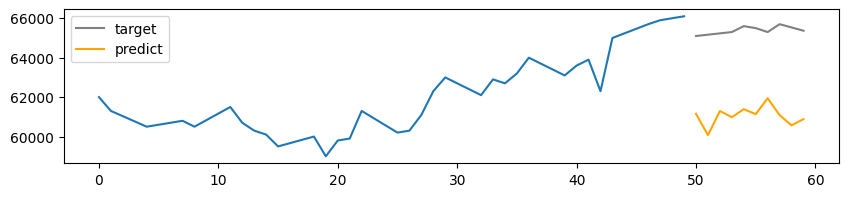

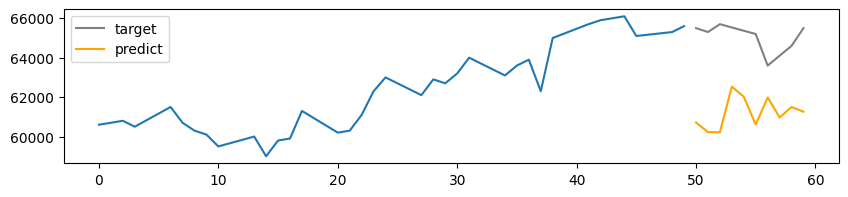

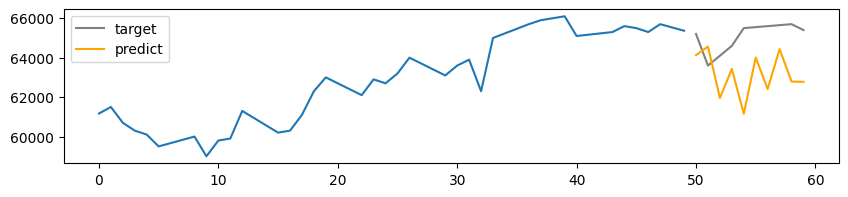

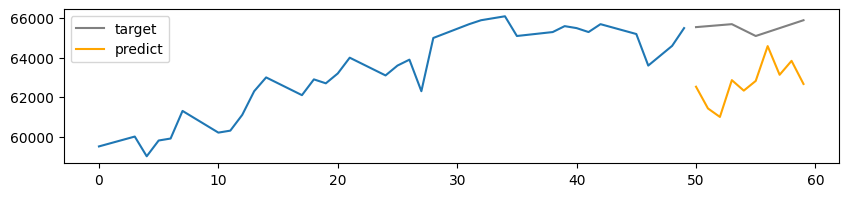

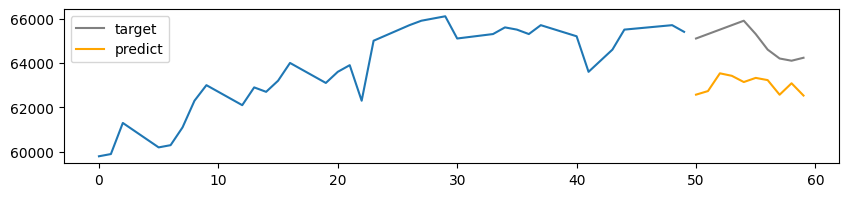

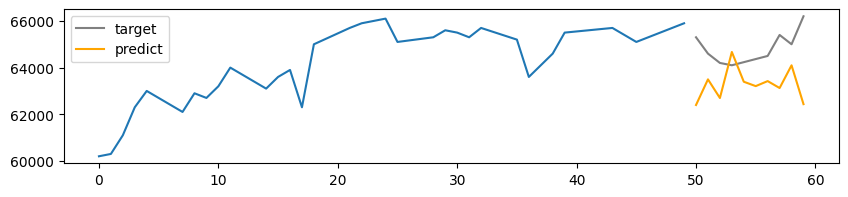

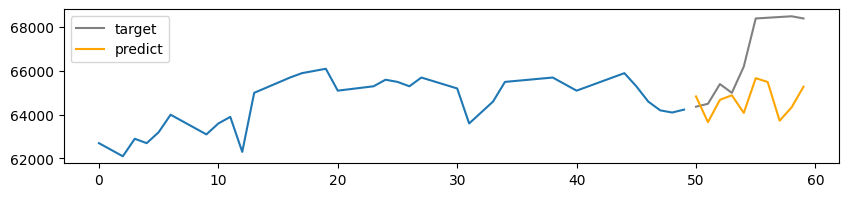

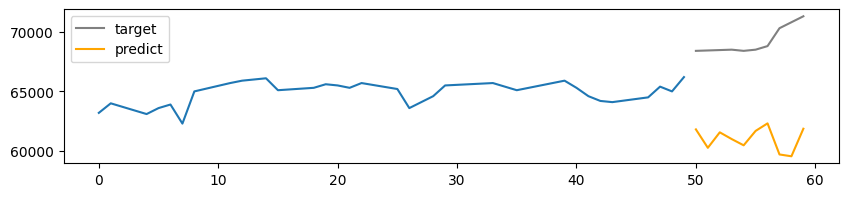

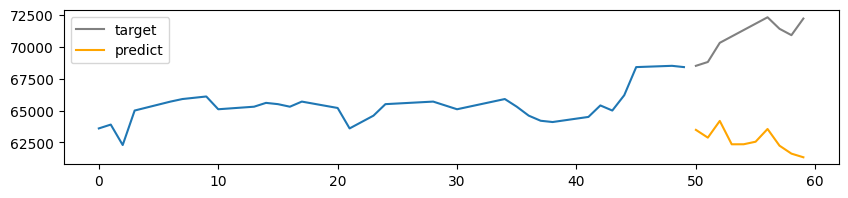

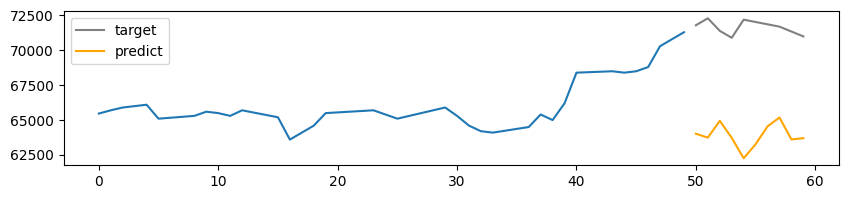

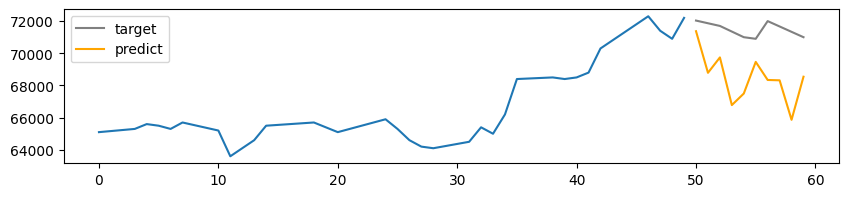

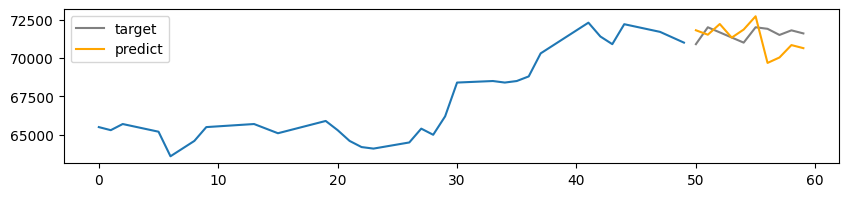

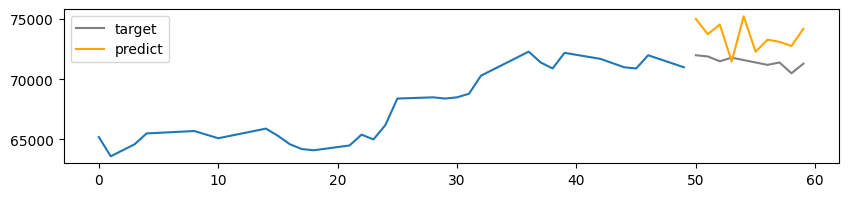

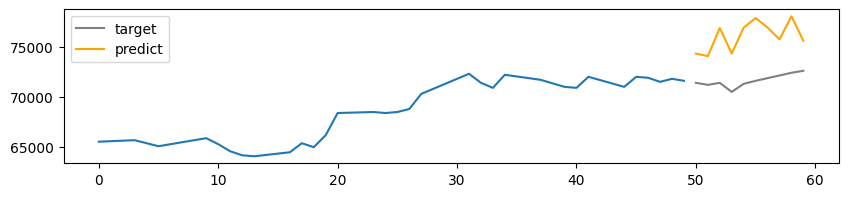

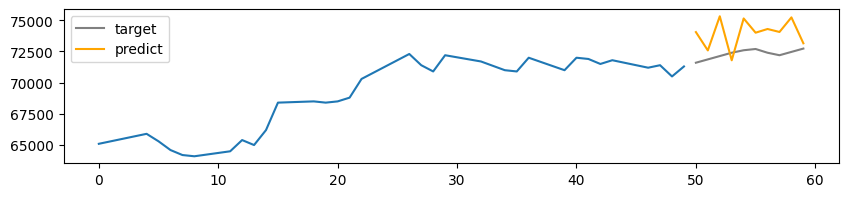

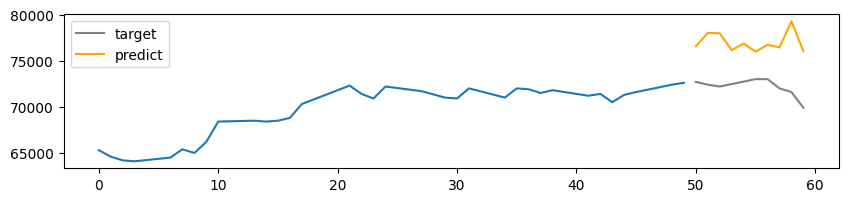

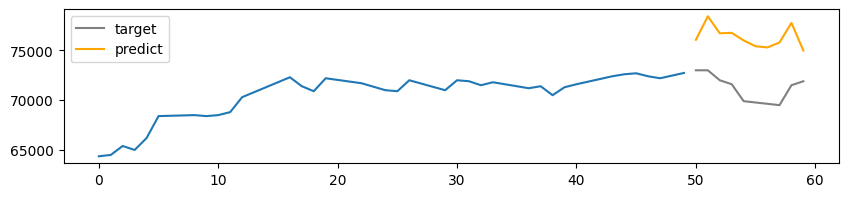

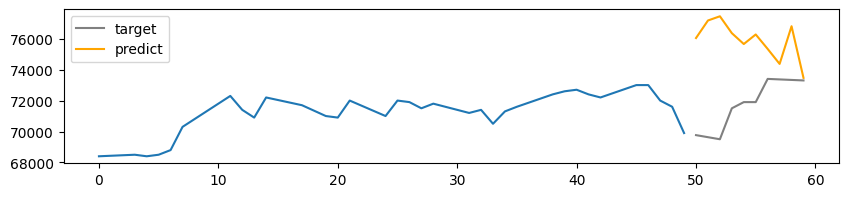

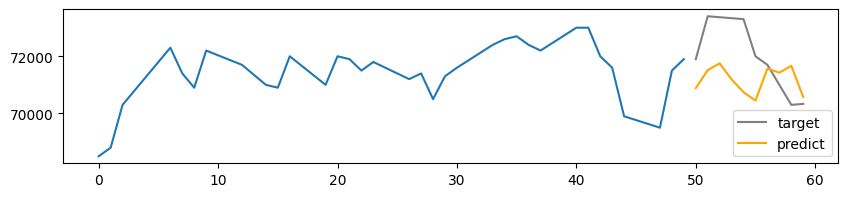

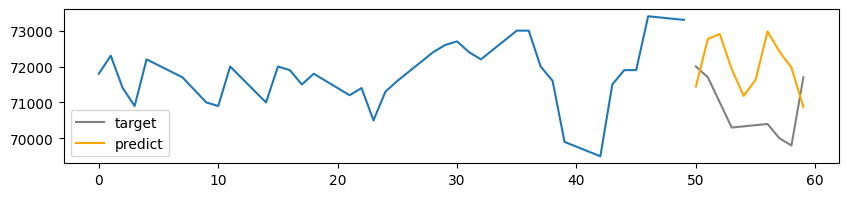

In [19]:


pred_test = model(X_te)
pred_test = y_scaler.inverse_transform(pred_test)

for idx in range(0, X_test.shape[0], 5):
    plt.figure(figsize=(10,2))
    plt.plot(np.arange(N_input), X_test[idx, :, 0])
    plt.plot(np.arange(N_input, N_input+N_output), y_test[idx, :], color='gray', label='target')
    plt.plot(np.arange(N_input, N_input+N_output), pred_test[idx, :], color='orange', label='predict')
    plt.legend()
    plt.show()


In [ ]:
10 11~ 예지보검(개인프로젝트)


14 15~ CNC 이상탐지(팀 프로젝트 진행) 4 4 3 으로 
